In [23]:
# data imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = "25,10"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["axes.labelsize"] = 16

Here we import the Marshall Project data. They come in 4 separate CSVs which we will later need to join

In [24]:
prison_cases = pd.read_csv("marshall-project-data/covid_prison_cases.csv")
prison_rates = pd.read_csv("marshall-project-data/covid_prison_rates.csv")
prison_pop = pd.read_csv("marshall-project-data/prison_populations.csv")
staff_pop = pd.read_csv("marshall-project-data/staff_populations.csv")

In [25]:
prison_cases.shape

(3366, 18)

In [26]:
prison_rates.shape

(52, 14)

Here we get only the data for tracking cases for Oklahoma prisons. We also change the date to a datetime, so that it becomes easy to manipulate

In [27]:
ok_prison_cases = prison_cases[prison_cases['name'] == 'Oklahoma']
ok_prison_cases['as_of_date'] = pd.to_datetime(ok_prison_cases['as_of_date'])
ok_prison_cases['as_of_month'] = ok_prison_cases['as_of_date'].dt.month
ok_prison_cases['as_of_year'] = ok_prison_cases['as_of_date'].dt.year
ok_prison_cases

/Users/stiwari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/stiwari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/stiwari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,name,abbreviation,staff_tests,staff_tests_with_multiples,total_staff_cases,staff_recovered,total_staff_deaths,staff_partial_dose,staff_full_dose,prisoner_tests,prisoner_tests_with_multiples,total_prisoner_cases,prisoners_recovered,total_prisoner_deaths,prisoners_partial_dose,prisoners_full_dose,as_of_date,notes,as_of_month,as_of_year
35,Oklahoma,OK,NaN,17286.0,1074.0,NaN,NaN,NaN,NaN,NaN,33132.0,7455.0,NaN,56.0,NaN,NaN,2021-06-22,NaN,6,2021
86,Oklahoma,OK,NaN,17286.0,1074.0,NaN,NaN,NaN,NaN,NaN,33117.0,7454.0,NaN,56.0,NaN,NaN,2021-06-15,NaN,6,2021
137,Oklahoma,OK,NaN,17286.0,1074.0,NaN,NaN,NaN,NaN,NaN,33028.0,7453.0,NaN,56.0,NaN,NaN,2021-06-08,NaN,6,2021
188,Oklahoma,OK,NaN,17286.0,1074.0,NaN,NaN,NaN,NaN,NaN,32944.0,7435.0,NaN,56.0,NaN,NaN,2021-06-02,NaN,6,2021
239,Oklahoma,OK,NaN,17286.0,1074.0,NaN,NaN,NaN,NaN,NaN,32842.0,7431.0,NaN,56.0,NaN,NaN,2021-05-25,NaN,5,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3146,Oklahoma,OK,NaN,NaN,9.0,NaN,0.0,NaN,NaN,NaN,458.0,1.0,NaN,0.0,NaN,NaN,2020-04-21,Staff numbers are self-reported. The number of...,4,2020
3197,Oklahoma,OK,NaN,NaN,8.0,NaN,0.0,NaN,NaN,NaN,309.0,1.0,NaN,0.0,NaN,NaN,2020-04-15,The number of tests conducted was mistakenly p...,4,2020
3248,Oklahoma,OK,NaN,NaN,5.0,NaN,0.0,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,NaN,2020-04-09,NaN,4,2020
3299,Oklahoma,OK,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,8.0,0.0,NaN,0.0,NaN,NaN,2020-04-01,staff have to go to own medical provider for t...,4,2020


Re-importing data for confirmed cases in the US so I can continue comparative analysis of prisons vs. US population.

In [108]:
confirmed_cases = pd.read_csv("../data-512-a4/RAW_us_confirmed_cases.csv")

date_columns = list(confirmed_cases.columns)#[11:]
confirmed_cases = pd.melt(confirmed_cases, value_vars=date_columns[11:], id_vars=date_columns[:11])
confirmed_cases.rename(columns={'variable':'Date', 'value':'Cases'}, inplace=True)
confirmed_cases

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,Date,Cases
0,Alabama,Autauga,84001001,US,USA,840,1001.0,US,32.539527,-86.644082,"Autauga, Alabama, US",1/22/20,0
1,Alabama,Baldwin,84001003,US,USA,840,1003.0,US,30.727750,-87.722071,"Baldwin, Alabama, US",1/22/20,0
2,Alabama,Barbour,84001005,US,USA,840,1005.0,US,31.868263,-85.387129,"Barbour, Alabama, US",1/22/20,0
3,Alabama,Bibb,84001007,US,USA,840,1007.0,US,32.996421,-87.125115,"Bibb, Alabama, US",1/22/20,0
4,Alabama,Blount,84001009,US,USA,840,1009.0,US,33.982109,-86.567906,"Blount, Alabama, US",1/22/20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172295,Wyoming,Teton,84056039,US,USA,840,56039.0,US,43.935225,-110.589080,"Teton, Wyoming, US",11/1/21,5218
2172296,Wyoming,Uinta,84056041,US,USA,840,56041.0,US,41.287818,-110.547578,"Uinta, Wyoming, US",11/1/21,3843
2172297,Wyoming,Unassigned,84090056,US,USA,840,90056.0,US,0.000000,0.000000,"Unassigned, Wyoming, US",11/1/21,0
2172298,Wyoming,Washakie,84056043,US,USA,840,56043.0,US,43.904516,-107.680187,"Washakie, Wyoming, US",11/1/21,1745


# US prisons

This table shows the total prisoner cases, number of prisoners, and prisoner infection rate by state

In [133]:
us_prison_total_cases = prison_cases.groupby('name')[['total_prisoner_cases']].max()
us_prison_population = prison_pop.groupby('name')[['pop']].max()
us_stats = pd.merge(us_prison_total_cases, us_prison_population, left_index=True, right_index=True).reset_index()
us_stats['prison_case_rate'] = us_stats['total_prisoner_cases'] / us_stats['pop']
us_stats.sort_values('prison_case_rate', ascending=False)#.head(10)

,name,total_prisoner_cases,pop,prison_case_rate
22,Michigan,26694.0,38176,0.699235
3,Arkansas,11425.0,17502,0.652783
17,Kentucky,7909.0,12162,0.650304
41,South Dakota,2344.0,3701,0.633342
16,Kansas,6117.0,9804,0.623929
15,Iowa,4899.0,8533,0.574124
12,Idaho,4174.0,7921,0.526954
1,Alaska,2440.0,4776,0.510888
5,Colorado,8960.0,17585,0.509525
44,Utah,3474.0,6900,0.503478


Here we compute the total prison infection rate for the entire country. This is an aggregated calculation and not an average.

In [82]:
total_prison_infection_rate = us_stats.total_prisoner_cases.sum() / us_stats['pop'].sum()
total_prison_infection_rate

0.29810815333175966

Here we compute the approximate infection rate for the general population of the United States. Calculated the same way as above

In [114]:
us_pop = 329500000
us_pop_rate = confirmed_case_data.groupby('Combined_Key')[['Cases']].last()['Cases'].sum() / us_pop
us_pop_rate

0.1398844430955994

# Oklahoma prisons

Here we collect the data for prisons in Oklahama. The table below shows the latest infection rate in Oklahoma prisons and other metadata

In [28]:
ok_prison_rates = prison_rates[prison_rates['name'] == 'Oklahoma']
ok_prison_rates

,name,latest_week,cumulative_prisoner_cases,prisoner_cases_pct,prisoner_case_rate,cumulative_prisoner_deaths,prisoner_deaths_pct,prisoner_death_rate,cumulative_staff_cases,staff_cases_pct,staff_case_rate,cumulative_staff_deaths,staff_deaths_pct,staff_death_rate
36,Oklahoma,06/22/2021,7455,0.298726,1 in 3 prisoners,56,0.002244,1 in 446 prisoners,1074,0.248784,1 in 4 staff,3,0.000695,1 in 1439 staff


In [29]:
ok_prison_pop = prison_pop[prison_pop['name'] == 'Oklahoma']
ok_prison_pop['as_of_date'] = pd.to_datetime(ok_prison_pop['as_of_date'])
ok_prison_pop['as_of_month'] = ok_prison_pop['as_of_date'].dt.month
ok_prison_pop['as_of_year'] = ok_prison_pop['as_of_date'].dt.year
ok_prison_pop

/Users/stiwari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/stiwari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/stiwari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,name,abbreviation,month,as_of_date,pop,as_of_month,as_of_year
504,Oklahoma,OK,march,2020-03-16,24956,3,2020
505,Oklahoma,OK,april,2020-04-13,24395,4,2020
506,Oklahoma,OK,june,2020-06-16,22875,6,2020
507,Oklahoma,OK,july,2020-07-31,22201,7,2020
508,Oklahoma,OK,aug,2020-08-31,21980,8,2020
509,Oklahoma,OK,sept,2020-09-28,21769,9,2020
510,Oklahoma,OK,oct,2020-11-02,21678,11,2020
511,Oklahoma,OK,nov,2020-11-30,21709,11,2020
512,Oklahoma,OK,dec,2021-01-04,21718,1,2021
513,Oklahoma,OK,jan_2021,2021-02-01,21665,2,2021


Here we merge the appropriate datasets collected by the Marshall Project to consolidate one final dataset with all desired statistics for the state of Oklahoma. This includes cases and deaths for prison staff and prisoners

In [44]:
ok_df = pd.merge(ok_prison_cases, ok_prison_pop[['as_of_month', 'as_of_year', 'pop']], on=['as_of_month', 'as_of_year'], how='outer')
ok_df = ok_df.sort_values('as_of_date')
ok_df


,name,abbreviation,staff_tests,staff_tests_with_multiples,total_staff_cases,staff_recovered,total_staff_deaths,staff_partial_dose,staff_full_dose,prisoner_tests,...,total_prisoner_cases,prisoners_recovered,total_prisoner_deaths,prisoners_partial_dose,prisoners_full_dose,as_of_date,notes,as_of_month,as_of_year,pop
74,Oklahoma,OK,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,2020-03-26,NaN,3,2020,24956.0
73,Oklahoma,OK,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,2020-04-01,staff have to go to own medical provider for t...,4,2020,24395.0
72,Oklahoma,OK,NaN,NaN,5.0,NaN,0.0,NaN,NaN,NaN,...,1.0,NaN,0.0,NaN,NaN,2020-04-09,NaN,4,2020,24395.0
71,Oklahoma,OK,NaN,NaN,8.0,NaN,0.0,NaN,NaN,NaN,...,1.0,NaN,0.0,NaN,NaN,2020-04-15,The number of tests conducted was mistakenly p...,4,2020,24395.0
70,Oklahoma,OK,NaN,NaN,9.0,NaN,0.0,NaN,NaN,NaN,...,1.0,NaN,0.0,NaN,NaN,2020-04-21,Staff numbers are self-reported. The number of...,4,2020,24395.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Oklahoma,OK,NaN,17286.0,1074.0,NaN,NaN,NaN,NaN,NaN,...,7431.0,NaN,56.0,NaN,NaN,2021-05-25,NaN,5,2021,21725.0
3,Oklahoma,OK,NaN,17286.0,1074.0,NaN,NaN,NaN,NaN,NaN,...,7435.0,NaN,56.0,NaN,NaN,2021-06-02,NaN,6,2021,21615.0
2,Oklahoma,OK,NaN,17286.0,1074.0,NaN,NaN,NaN,NaN,NaN,...,7453.0,NaN,56.0,NaN,NaN,2021-06-08,NaN,6,2021,21615.0
1,Oklahoma,OK,NaN,17286.0,1074.0,NaN,NaN,NaN,NaN,NaN,...,7454.0,NaN,56.0,NaN,NaN,2021-06-15,NaN,6,2021,21615.0


In [31]:
ok_df.shape

(75, 22)

Below we generate some descriptive statistics for our final Oklahoma prison dataset

In [32]:
ok_df.describe(include='all').transpose()

/Users/stiwari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
index,75.0,NaN,NaN,NaN,NaT,NaT,37.0,21.794495,0.0,18.5,37.0,55.5,74.0
name,75,1,Oklahoma,75,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abbreviation,75,1,OK,75,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
staff_tests,0.0,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
staff_tests_with_multiples,45.0,NaN,NaN,NaN,NaT,NaT,10753.933333,5208.571866,1770.0,5586.0,12061.0,15016.0,17286.0
total_staff_cases,75.0,NaN,NaN,NaN,NaT,NaT,554.8,431.171346,0.0,66.5,524.0,1022.0,1074.0
staff_recovered,5.0,NaN,NaN,NaN,NaT,NaT,242.0,49.48232,174.0,215.0,245.0,278.0,298.0
total_staff_deaths,27.0,NaN,NaN,NaN,NaT,NaT,0.444444,1.086042,0.0,0.0,0.0,0.0,3.0
staff_partial_dose,8.0,NaN,NaN,NaN,NaT,NaT,0.0,0.0,0.0,0.0,0.0,0.0,0.0
staff_full_dose,9.0,NaN,NaN,NaN,NaT,NaT,120.777778,362.333333,0.0,0.0,0.0,0.0,1087.0


In [33]:
ok_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   index                          75 non-null     int64         
 1   name                           75 non-null     object        
 2   abbreviation                   75 non-null     object        
 3   staff_tests                    0 non-null      float64       
 4   staff_tests_with_multiples     45 non-null     float64       
 5   total_staff_cases              75 non-null     float64       
 6   staff_recovered                5 non-null      float64       
 7   total_staff_deaths             27 non-null     float64       
 8   staff_partial_dose             8 non-null      float64       
 9   staff_full_dose                9 non-null      float64       
 10  prisoner_tests                 0 non-null      float64       
 11  prisoner_tests_with_m

The Oklahoma prison cases are counted as a running total, so below I look to compute the daily number of cases by taking the difference in cases for consecutive days. I also compute the prisoner infection and death rates.

In [45]:
ok_prison_daily_cases = np.diff(ok_df['total_prisoner_cases'])
ok_prison_daily_cases = np.insert(ok_prison_daily_cases, 0, [0])
ok_prison_daily_deaths = np.diff(ok_df['total_prisoner_deaths'])
ok_prison_daily_deaths = np.insert(ok_prison_daily_deaths, 0, [0])

ok_df['prisoner_daily_cases'] = ok_prison_daily_cases
ok_df['prisoner_daily_deaths'] = ok_prison_daily_deaths


ok_df['prisoner_death_rate'] = ok_df['prisoner_daily_deaths'] / ok_df['pop']
ok_df['prisoner_case_rate'] = ok_df['prisoner_daily_cases'] / ok_df['pop']

Below I wanted to reintroduce the data for Oklahoma general population so I can continue my comparative analysis. I reimport the data and compute the infection rates using the equation
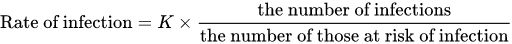
where $K$ is 100 to make this a percentage.

In [85]:
oklahoma_pop = 796292


oklahoma_merged = pd.read_csv('../data-512-a4/oklahoma_merged.csv')
never_prop = oklahoma_merged['NEVER'].values[0]
rarely_prop = oklahoma_merged['RARELY'].values[0]
at_risk_prop = never_prop + rarely_prop

oklahoma_merged['Infection Rate'] = oklahoma_merged['Daily_cases']/((oklahoma_pop-oklahoma_merged['Cases'])*at_risk_prop)
oklahoma_merged['Date'] = pd.to_datetime(oklahoma_merged['Date'])
oklahoma_merged.head()

,Unnamed: 0,State,County,FIPS,Latitude,Longitude,Date,Cases,Daily_cases,State_Tribe_Territory,...,Source_of_Action,URL,Citation,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,Infection Rate
0,0,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2020-01-22,0,0,NaN,...,NaN,NaN,NaN,40109,0.096,0.064,0.097,0.225,0.518,0.0
1,1,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2020-01-23,0,0,NaN,...,NaN,NaN,NaN,40109,0.096,0.064,0.097,0.225,0.518,0.0
2,2,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2020-01-24,0,0,NaN,...,NaN,NaN,NaN,40109,0.096,0.064,0.097,0.225,0.518,0.0
3,3,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2020-01-25,0,0,NaN,...,NaN,NaN,NaN,40109,0.096,0.064,0.097,0.225,0.518,0.0
4,4,Oklahoma,Oklahoma County,109,35.551401,-97.407169,2020-01-26,0,0,NaN,...,NaN,NaN,NaN,40109,0.096,0.064,0.097,0.225,0.518,0.0


Below we calculate the infection rate in Oklahoma prisons, as well as infection rate in the Oklahoma general population. This allows us to generate an effective visualization comparing the case rates since the beginning of the pandemic and highlight the discrepancies of the two.

In [151]:
ok_prison_infection_rate = float(us_stats.loc[us_stats['name'] == 'Oklahoma', 'prison_case_rate'])
ok_prison_infection_rate

0.2987257573329059

In [152]:
ok_infection_rate = oklahoma_merged.Daily_cases.sum() / oklahoma_pop
ok_infection_rate

0.15000401862633306

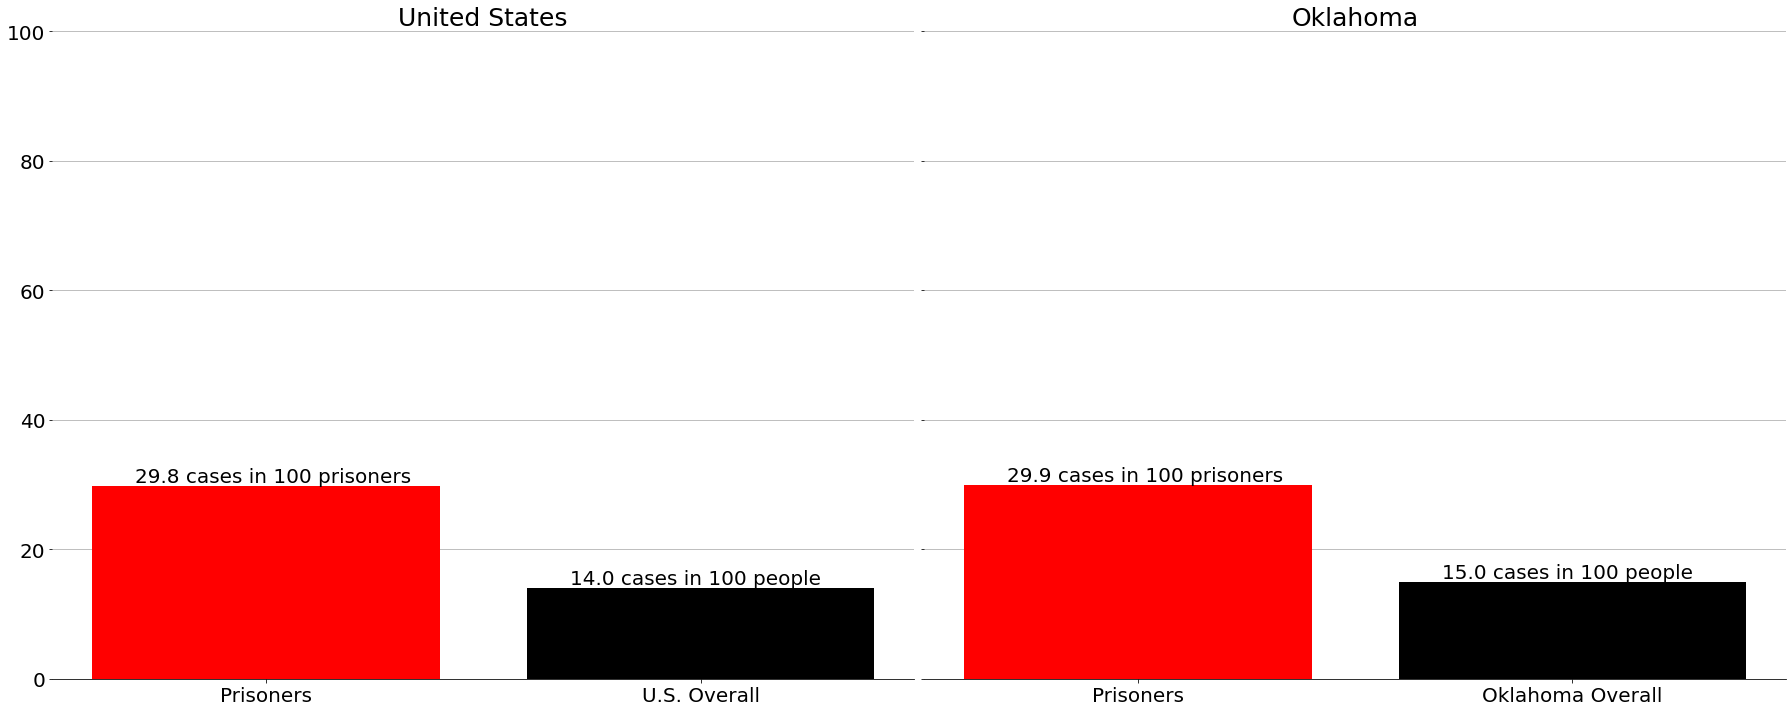

In [153]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.bar(['Prisoners', 'U.S. Overall'], [total_prison_infection_rate*100, us_pop_rate*100], color=['red', 'black'], zorder=3)
xlocs=[i+1 for i in range(2)]
plt.text(-0.3, total_prison_infection_rate*100 + 0.6, f"{round(total_prison_infection_rate*100, 1)} cases in 100 prisoners", fontsize=20)
plt.text(0.7, us_pop_rate*100 + 0.6, f"{round(us_pop_rate*100, 1)} cases in 100 people", fontsize=20)
plt.title('United States', fontsize=25);
plt.ylim([0, 100]);
frame1 = plt.gca()
frame1.yaxis.grid(zorder=0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(1, 2, 2)
plt.bar(covid_rates_ok['pop'], [ok_prison_infection_rate*100, ok_infection_rate*100], color=['red', 'black'], zorder=3)
xlocs=[i+1 for i in range(2)]
plt.text(-0.3, ok_prison_infection_rate*100 + 0.6, f"{round(ok_prison_infection_rate*100, 1)} cases in 100 prisoners", fontsize=20)
plt.text(0.7, ok_infection_rate*100 + 0.6, f"{round(ok_infection_rate*100, 1)} cases in 100 people", fontsize=20)
plt.title('Oklahoma', fontsize=25);
plt.ylim([0, 100]);
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([]);
frame1.yaxis.grid(zorder=0)
plt.xticks(fontsize=20);
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout();

# plt.savefig('ok_us_case_barchart.png', transparent=True)


Here we plot the infection rates over time for both Oklahoma prisons and general population

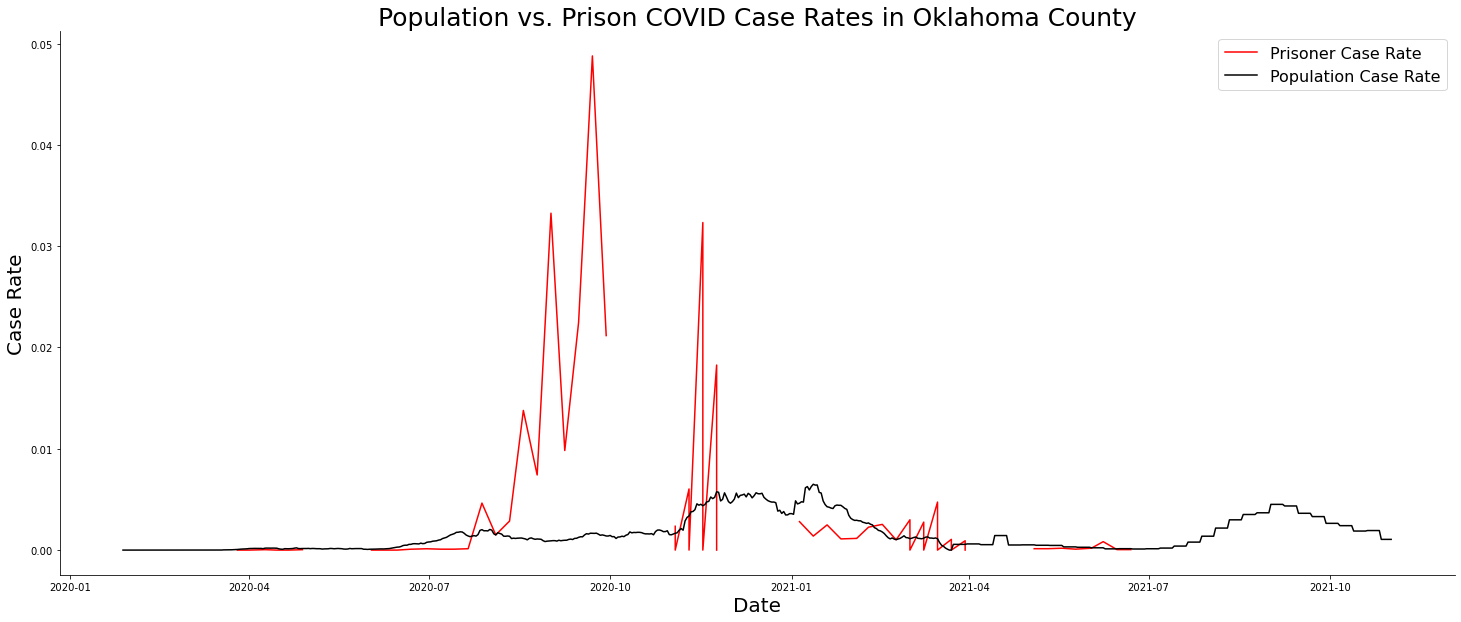

In [162]:
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot(ok_df['as_of_date'], ok_df['prisoner_case_rate'], label='Prisoner Case Rate', color='red');
plt.plot(oklahoma_merged['Date'], oklahoma_merged['Infection Rate'].rolling(window=7).mean(), label='Population Case Rate', color='black');
plt.title("Population vs. Prison COVID Case Rates in Oklahoma County", fontsize=25);
plt.xlabel("Date", fontsize=20);
plt.ylabel("Case Rate", fontsize=20)
# ax.set_facecolor('#E7826C')
plt.legend();
# plt.savefig('ok_case_rate.png', transparent=True)


Here I perform linear regression to model the trend of the prison rates

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
X = oklahoma_merged.drop('Infection Rate', axis=1)
y = oklahoma_merged['Infection Rate']

x = np.array(oklahoma_merged['Date'].index).reshape(-1, 1)
lr = LinearRegression(fit_intercept=False).fit(x, y)
ok_coef = lr.coef_[0]
ok_coef

4.356042363145079e-06

In [50]:
X = ok_df.drop('prisoner_case_rate', axis=1)
y = ok_df['prisoner_case_rate']

x = np.array(ok_df['as_of_date'].index).reshape(-1, 1)
y = np.nan_to_num(y)
lr = LinearRegression(fit_intercept=False).fit(x, y)
ok_prison_coef = lr.coef_[0]
ok_prison_coef

8.048705016569552e-05

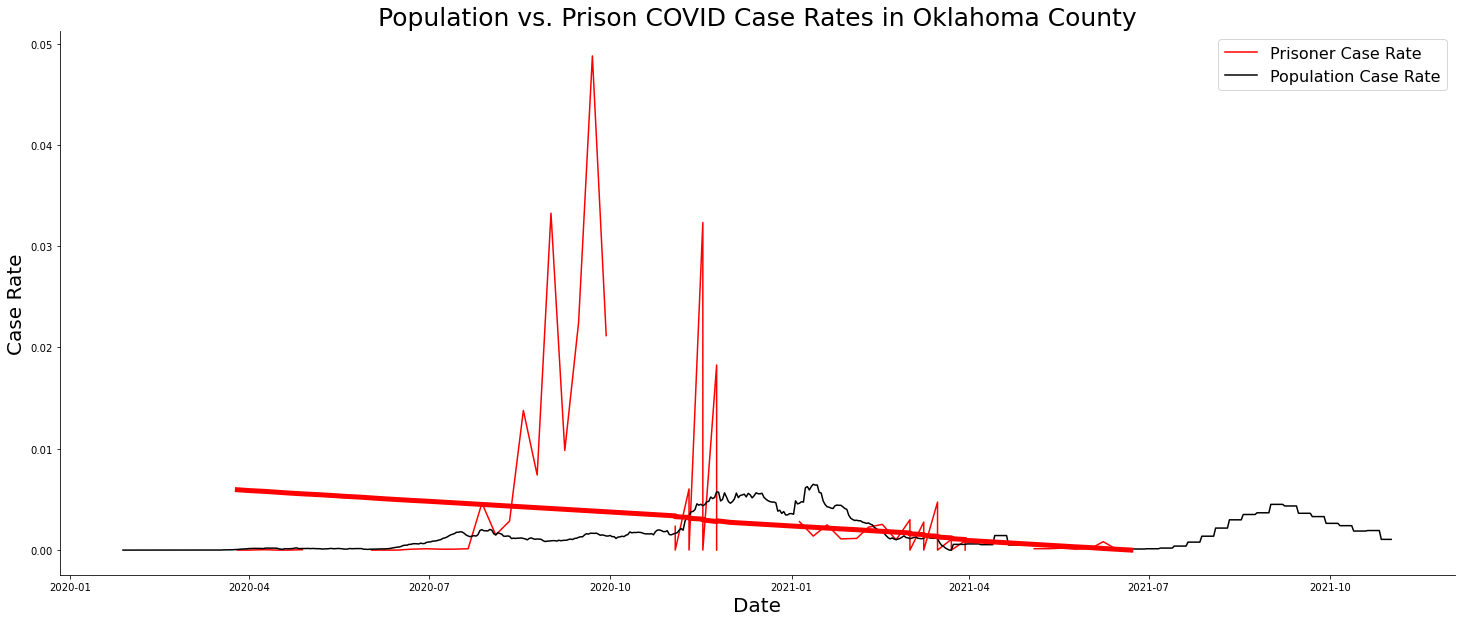

In [163]:
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot(ok_df['as_of_date'], ok_df['prisoner_case_rate'], label='Prisoner Case Rate', color='red');
plt.plot(oklahoma_merged['Date'], oklahoma_merged['Infection Rate'].rolling(window=7).mean(), label='Population Case Rate', color='black');
# plt.plot(oklahoma_merged['Date'], coef*oklahoma_merged.index)
plt.plot(ok_df['as_of_date'], ok_prison_coef*ok_df.index, lw=5, color='red')
plt.title("Population vs. Prison COVID Case Rates in Oklahoma County", fontsize=25);
plt.xlabel("Date", fontsize=20);
plt.ylabel("Case Rate", fontsize=20)
# ax.set_facecolor('#E7826C')
plt.legend();

# plt.savefig('ok_case_rate_with_lr.png', transparent=True)


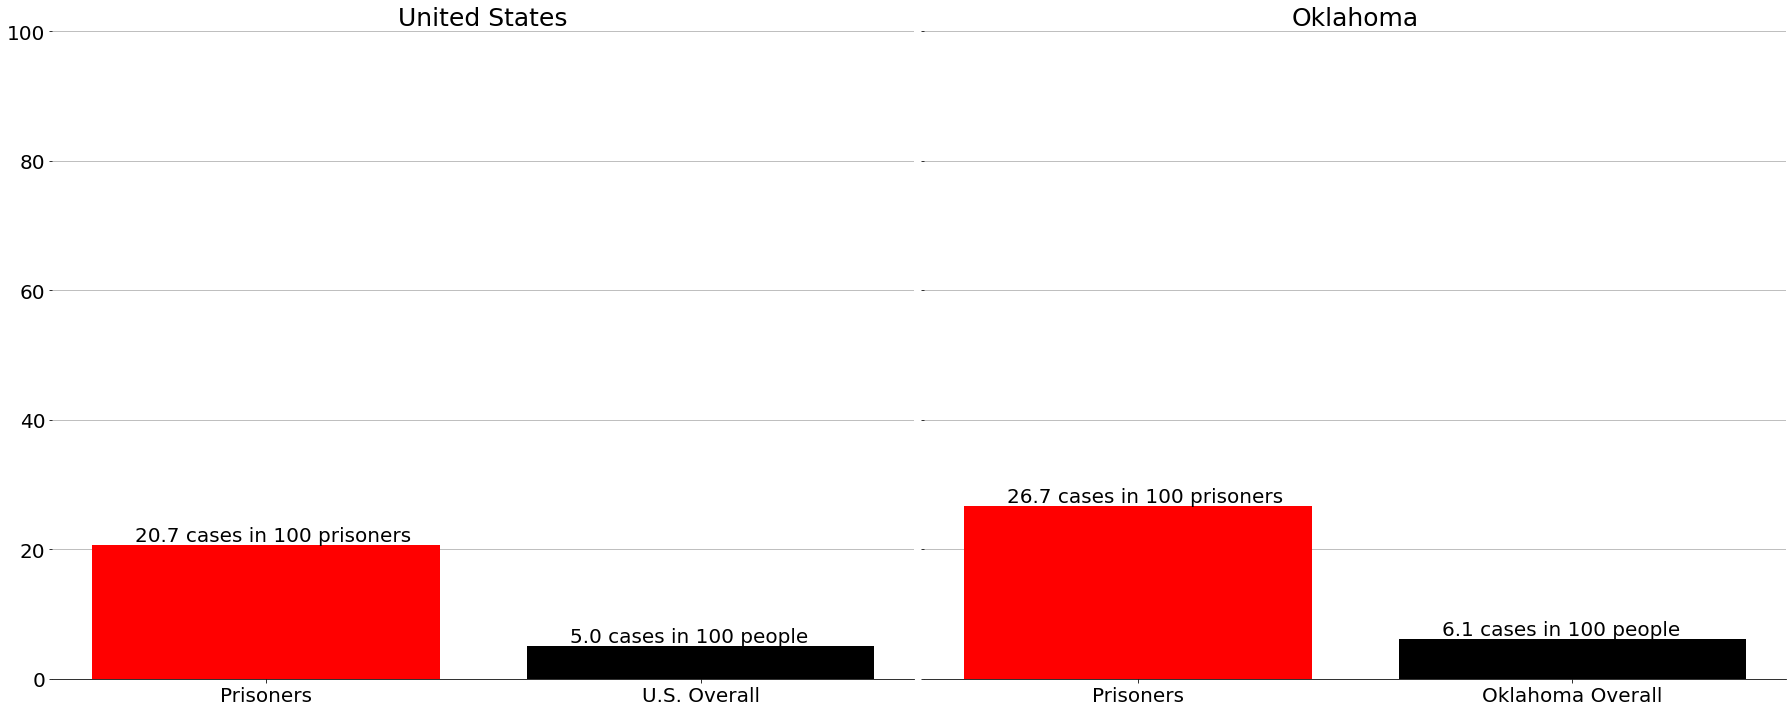

In [53]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.bar(covid_rates_us['pop'], covid_rates_us['rate'], color=['red', 'black'], zorder=3)
xlocs=[i+1 for i in range(2)]
plt.text(-0.3, covid_rates_us['rate'][0] + 0.6, f"{covid_rates_us['rate'][0]} cases in 100 prisoners", fontsize=20)
plt.text(0.7, covid_rates_us['rate'][1] + 0.6, f"{covid_rates_us['rate'][1]} cases in 100 people", fontsize=20)
plt.title('United States', fontsize=25);
plt.ylim([0, 100]);
frame1 = plt.gca()
frame1.yaxis.grid(zorder=0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax = fig.add_subplot(1, 2, 2)
plt.bar(covid_rates_ok['pop'], covid_rates_ok['rate'], color=['red', 'black'], zorder=3)
xlocs=[i+1 for i in range(2)]
plt.text(-0.3, covid_rates_ok['rate'][0] + 0.6, f"{covid_rates_ok['rate'][0]} cases in 100 prisoners", fontsize=20)
plt.text(0.7, covid_rates_ok['rate'][1] + 0.6, f"{covid_rates_ok['rate'][1]} cases in 100 people", fontsize=20)
plt.title('Oklahoma', fontsize=25);
plt.ylim([0, 100]);
frame1 = plt.gca()
frame1.axes.yaxis.set_ticklabels([]);
frame1.yaxis.grid(zorder=0)
plt.xticks(fontsize=20);
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.tight_layout();

# plt.savefig('ok_us_case_barchart.png', transparent=True)




In [55]:
ok_df['population'] = 'prisoner'
oklahoma_merged['population'] = 'person'

oklahoma_population = oklahoma_merged[['Date', 'population', 'Infection Rate']]
oklahoma_prisons = ok_df[['as_of_date', 'population', 'prisoner_case_rate']]

oklahoma_population.rename(columns={'Date':'date', 'Infection Rate':'case_rate'}, inplace=True)
oklahoma_prisons.rename(columns={'as_of_date':'date', 'prisoner_case_rate':'case_rate'}, inplace=True)

Here is a chart of the prison cases over a certain month. We can see that the number of cases increases by more than threefold in a single week.

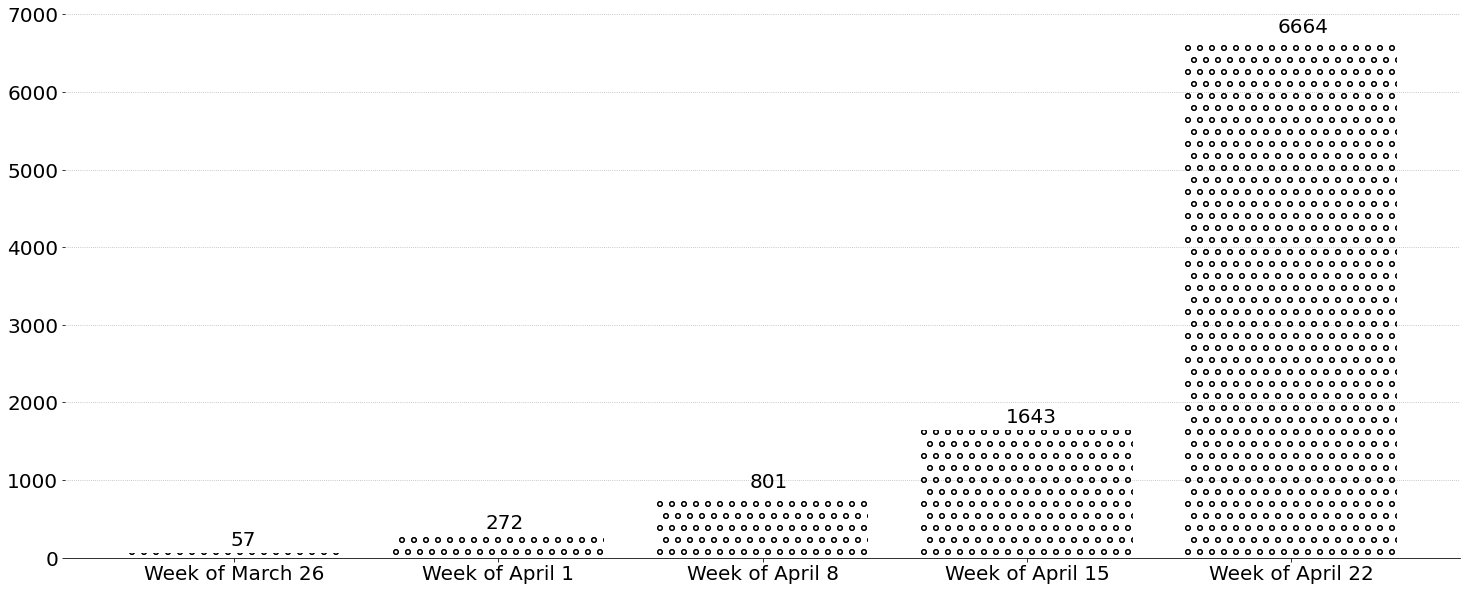

In [318]:
covid_us_weekly = pd.DataFrame(columns = ['week', 'cases'], data=[['Week of March 26', 57], ['Week of April 1', 272], ['Week of April 8', 801], ['Week of April 15', 1643], ['Week of April 22', 6664]])

fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.bar(covid_us_weekly['week'], covid_us_weekly['cases'], color=['white', 'white', 'white', 'white', 'white'], zorder=3, hatch='o', alpha=0)
plt.text(-0.015, covid_us_weekly['cases'][0] + 100, f"{covid_us_weekly['cases'][0]}", fontsize=20);
plt.text(0.95, covid_us_weekly['cases'][1] + 100, f"{covid_us_weekly['cases'][1]}", fontsize=20);
plt.text(1.95, covid_us_weekly['cases'][2] + 100, f"{covid_us_weekly['cases'][2]}", fontsize=20);
plt.text(2.92, covid_us_weekly['cases'][3] + 100, f"{covid_us_weekly['cases'][3]}", fontsize=20);
plt.text(3.95, covid_us_weekly['cases'][4] + 100, f"{covid_us_weekly['cases'][4]}", fontsize=20);
frame1 = plt.gca()
frame1.yaxis.grid(zorder=0, linestyle='dotted');
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.ylim((0, 7000));

plt.savefig('us_weekly_cases.png', transparent=True)

# ANOVA

ANOVA (ANalysis Of VAriance) is a test that can be used to compare the means of more than two groups. It uses a variance-based F test to check the group mean equality, testing a non-specific null hypothesis that all group means are equal. In the context of this problem, I compared the mean infection rates of the prison and general populations of Oklahoma since March of 2020. Looking at this problem from a more aggregated approach would zoom out and compare the two populations by taking a more encompassing view of the week-to-week infection rates, and be less prone to skew from the underreporting of cases within prisons.

For my ANOVA analysis, I used the hypotheses:

- H0: The mean rate of infection of prisoners is equal to the mean rate of infection for the general population
- HA: The mean rate of infection of prisoners is different than the mean rate of infection for the general population


In [ ]:
ok_df['population'] = 'prisoner'
oklahoma_merged['population'] = 'person'

oklahoma_population = oklahoma_merged[['Date', 'population', 'Infection Rate']]
oklahoma_prisons = ok_df[['as_of_date', 'population', 'prisoner_case_rate']]

oklahoma_population.rename(columns={'Date':'date', 'Infection Rate':'case_rate'}, inplace=True)
oklahoma_prisons.rename(columns={'as_of_date':'date', 'prisoner_case_rate':'case_rate'}, inplace=True)

In [417]:
oklahoma_anova_df = pd.concat([oklahoma_population, oklahoma_prisons], ignore_index=True)


/Users/stiwari/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 37.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='population', ylabel='case_rate'>

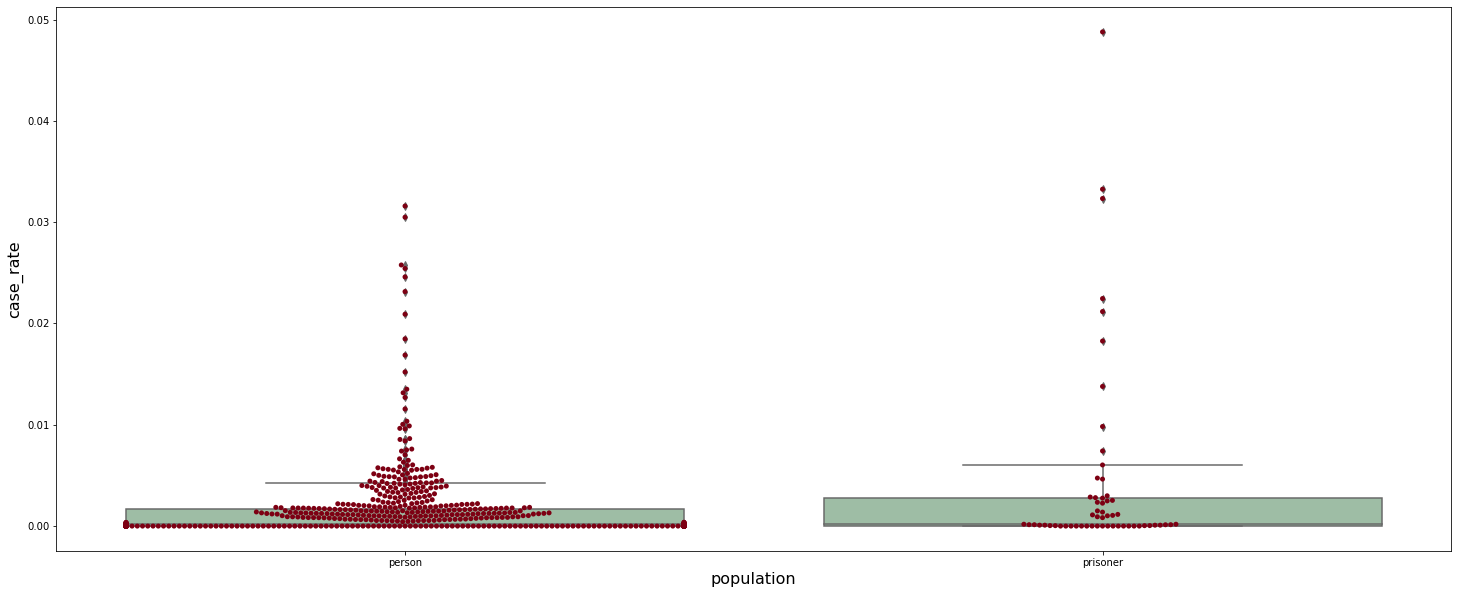

In [420]:
fig = plt.figure()
sns.boxplot(x='population', y='case_rate', data=oklahoma_anova_df, color='#99c2a2')
sns.swarmplot(x="population", y="case_rate", data=oklahoma_anova_df, color='#7d0013')

In [421]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('case_rate ~ C(population)', data=oklahoma_anova_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(population),0.000423,1.0,23.167162,0.000002
Residual,0.012896,706.0,NaN,NaN


We get a significant p-value so we reject the null. There is a significant difference between the prison and population infection rates

In [423]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=oklahoma_anova_df, res_var='case_rate', anova_model='case_rate ~ C(population)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(population),1.0,0.000423,0.000423,23.167162,0.000002
Residual,706.0,0.012896,0.000018,NaN,NaN
